# Maximum Likelihood

Consider that we have classification problem like below.

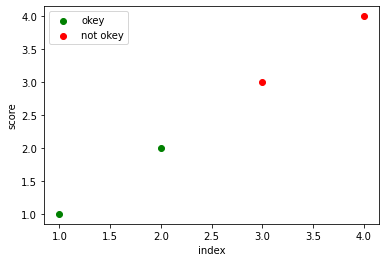

In [ ]:
plt.scatter([1,2],[1,2],color = "green",label = "okey")
plt.scatter([3,4],[3,4], color = "red", label = "not okey")
plt.xlabel("index")
plt.ylabel("score")
plt.legend()

The model should predict the labels as okey or not okey. While predicting the labels, it will be predicting likelihood. Lets asume that the model estimate them like below:

- $P(x;w)$ is the probabilty of okey and $P'(x;w)$ is the probabilty of not okey.
- $P_{index=1}(x;w) = 0.9$ 
- $P_{index=2}(x;w) = 0.6$  
- $P'_{index=3}(x;w) = 0.7$
- $P'_{index=4}(x;w) = 0.9$    

For green points, being close to (0,0) is more likely for P(x) and for red point being close to (4,4) is more likely for P'(x).

If we want to calculate the success of classifying all points of the model, we must calculate the probability of correctness of all predictions. These are discreate events, so we should multiply the probabilities. 

In [ ]:
0.9*0.8*0.7*0.9

0.4536

Lets assume that the model is not good. The predictions are 0.1 0.2 0.3 0.25

In [ ]:
0.1*0.2*0.3*0.25

0.0015000000000000002

Lets assume that we made more then 4 predictions

In [ ]:
x = 0.2
for _ in range(20):
    x = x*x

x 

0.0

Accualy the result is not 0 but python cast it to 0. We have talked about this, poor condition.

The product does not work well for the numbers between [0,1) We can turn products into sums with logarithm.

In [ ]:
import math
p = [0.2,0.3,0.25]
x = math.log(0.1)
for i in p:
    x = x + math.log(i)
x

-6.502290170873972

We got negative number, lets convert it to positive

# Cross Entropy

In [ ]:
p = [0.2,0.3,0.25]
x = -math.log(0.1)
for i in p:
    x = x - math.log(i)
x

6.502290170873972

For low probabilites, we got 6.50, what would happen if the model is good and probabilites are high.

In [ ]:
p = [0.7,0.9,0.8]
x = -math.log(0.6)
for i in p:
    x = x - math.log(i)
x

1.1960046346767592

We got smaller number, for model accuracy we can descent the cross entropy. We assign the probabilites as P and P' but we got just 1 result. We can generalize it like:

- Cross-Entropy = $-\sum y_{i}ln(p_{i}) + (1-y_{i})ln(1-p_{i})$

What would happen if we have more then 2 classes?

# Multi-Class Cross Entropy

Adding new term form every class is absurd. The formula becomes:
- MultiClass-Cross-Entropy = $-\sum_{i}^{n}\sum_{j}^{m}y_{ij}ln(p_{ij})$

If we apply it for 2 classes, we can see that Cross-Entropy and MultiClass-Cross-Entropy formulas are same.

# Logistic Regression

    Imagine that you are a data scientist working at a casino.Casino has a game that there is a tricky coin, it has the number 1 in front and the number 0 behind it. Cause of Corona the casino was closed for 3 years , after Turkish scientist from Yıldız Technical University found the vaccine, it was decided that the casino would be opening. The gambler quit the work and no one knows which side of the coin is making money to the casino.

    Casino built a system to find out that.The game is played autonomously and it takes a picture of which side of the coin came as a result of the game.First,photographer tried to seperate them. There were many images that a person can not figure out which side of the coin is making money to the casino. So we have some photos labelled and unlabelled.

    As a data scientist, you must build a model to solve this problem. Lets begin ...

First of all, lets begin reading labelled images. We need to import PIL

In [1]:
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from pathlib import Path
import os

In [2]:
path = Path("C:/Users/bilgisayar/Desktop/Ml_implementations/Intro2ML/data/mnist/")

In [3]:
image = Image.open(path/"zeros/1.png")

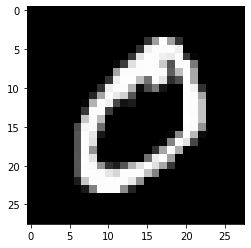

In [4]:
plt.imshow(image, cmap='gray')

Nice !!! We have access photos.

Know lets think what we can do to classify these photos ? If we average all pixels of all images, we can evaluate images that we will classify as 0 or 1.

So we need to avarage all images each of class 0 and 1.

In [5]:
list(path.iterdir())
Path.ls = lambda x: list(x.iterdir())

In [6]:
zeros =[torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (path/"zeros").ls()]

In [7]:
ones =[torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (path/"ones").ls()]

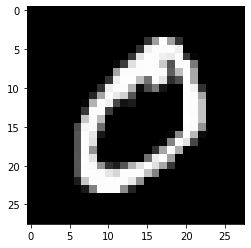

In [8]:
plt.imshow(zeros[0], cmap = "gray");

In [9]:
zeros_stack,ones_stack = torch.stack(zeros)  , torch.stack(ones) 

In [10]:
zeros_stack.shape

torch.Size([5923, 28, 28])

In [11]:
ones_stack.shape

torch.Size([6742, 28, 28])

In [12]:
zeros_avg= zeros_stack.mean(0) 

In [13]:
ones_avg = ones_stack.mean(0)

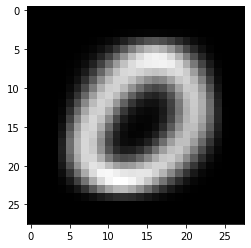

In [14]:
plt.imshow(zeros_avg , cmap = "gray")

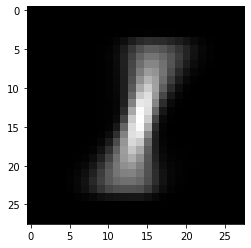

In [15]:
plt.imshow(ones_avg , cmap = "gray")

Well, we have mean.Lets find a loss function that when we decrase the loss evalation metric will be increasing. What would happen if we meausere the euclidian distance between avarage and images we want to classify ? Lets try and see.

In [16]:
def loss(avg,real):
    return ((avg -real)**2).mean((-1,-2))

In [17]:
loss(zeros_avg,zeros[0])

tensor(2299.9585)

In [18]:
loss(ones_avg,zeros[0])

tensor(7474.8770)

The loss should be small. If the distance is high this means our image doesn't look like avarage. We can do some simple comparison. Calculate loss for both class and choose that the small one.  

In [19]:
def which_class(img):
    return 0 if loss(zeros_avg,img)<loss(ones_avg,img) else 1

In [20]:
which_class(zeros[0])

0

In [21]:
which_class(ones[0])

1

Perfect, that is working, lets look at how many of them correctly classify by our model.

In [22]:
def accuracy(zeros,ones):
    return float(((loss(zeros_avg,zeros)<loss(ones_avg,zeros)).sum() +  (loss(zeros_avg,ones)>loss(ones_avg,ones)).sum()))/(len(ones)+len(zeros))

In [23]:
accuracy(zeros_stack,ones_stack)

0.9920252664824319

Incredible !!!! I have never experienced reaching 99 percent of accuary until now with any neural network architecture. But there is a little problem here. We train our model with whole data and test it on same data. This is wrong. We do not know what would happen if we tested the model on it did not interact? Lets split the dataset on see what is will happen.

In [24]:
def train_validation_split(data,val_per):
    
    indices = torch.randperm(len(data))
    train = data[int(np.floor(len(data)*val_per/100)):]
    validation = data[:int(np.floor(len(data)*val_per/100))]

    return train,validation
    

In [25]:
trainzero,validationzero = train_validation_split(zeros_stack,50)

In [26]:
trainzero.shape

torch.Size([2962, 28, 28])

In [27]:
validationzero.shape

torch.Size([2961, 28, 28])

In [28]:
trainone , validationone = train_validation_split(ones_stack,50)

In [29]:
zeros_avg= trainzero.mean(0) 
ones_avg = trainone.mean(0)

In [30]:
accuracy(validationzero,validationone)
    

0.9930511686670878

Unexpectedly it increased !!! I would say "What can we do to icrease the accuracy?" if it was low. But we should not stop here. Maybe we can find a better way. The pixel values our information sources about the class of image. Every single pixel has a different meaning and some pixels are more important. We should highlight the important pixels for our model. We can add weight to important pixels. How can we know that which pixel is important ? Maybe we should add weight to all pixels and then we can do some changes on weights. Maybe we can devolop an algorithm to optimize weights. Lets go on.

Our images has 28*28 = 784 pixels so we need 784 weights. Then add a bias.

In [55]:
w = torch.randn((784,1), dtype=torch.float32)
bias = torch.randn(1, dtype=torch.float32)

In [56]:
bias.shape

torch.Size([1])

In [57]:
train = torch.cat((trainzero,trainone),0).view(-1,28*28)

In [58]:
train.shape


torch.Size([6333, 784])

Now lets multiple the weights with the pixels.

In [59]:
def multiple(weights,pixels):
    return pixels@weights+bias

In [60]:
validation = torch.cat((validationzero,validationone),0).view(-1,28*28)
validation.shape

torch.Size([6332, 784])

In [61]:
prediction = multiple(w,validation)
prediction.shape

torch.Size([6332, 1])

In [62]:
prediction[0]

tensor([-3095.8335])

Now we have only one value for each image. How can we classify images by using this number ? If this values make sense about classifying, then we can choose a pivot value and if the value smaller than pivot, we say that the class of that image is bla bla... Lets look at that.

In [63]:
pivot = 50 
def accuracy(validation,ci):
    return float(((prediction[:ci]<pivot).sum() +  (prediction[ci:]>pivot).sum()))/len(prediction)

In [64]:
accuracy(validation,len(validationzero))

0.48404927353126975

:) accuracy is fifty percent like flipping coin not tricky one :d. Cause of random weights, we get this result.If we optimize the parameters, then we can reach a good result.

In [65]:
w[0] = w[0]*2
accuracy(validation,len(validationzero))

0.48404927353126975

As we see above, the accuracy can not be used for optimizing weight parameters because when we change one of weights,we can not see any changes on the result of our metric. For optimizing parameters we can not use accuracy metic and need a new one.

There is one problem about our range. -infinity and +infinity range has a really large scale. We are calculating probiblty,0-1. If we find a function,then we can set our range [0,1].Our value is X. X/(X+1) looks good because when x goes to +infinity the result is 1. When x == 0 the result is 0. But if x == -1, that is a problem but function is good. X should not take - values. Then we need a function always positive. Exponential works. exp(X)/exp(X)+1 is a great function. Accualy this function has a special name, sigmoid.

In [66]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [67]:
sigmoid(prediction[1])

tensor([0.])

In [68]:
def loss(prediction):
    prediction = prediction.sigmoid()
    return (prediction[:len(trainzero)].sum() + (1-prediction[len(trainzero):]).sum())/len(train)
    

In [69]:
loss(prediction)

tensor(0.5143)

How can we optimize the parameters ? We have a loss function that we want to decrease. We need to find the global minimum of that function.If we take derivative of function and then go to opposite direction then we decrase our loss function. This called as gradient descent. We wiil use Pytorch to take derivative.

Now we will discover a new architecture. We manually initialized weights,bias and developed a model, but pure python is really slow. Matrix multiplication is not the best thing python does.Lets do all things with Pytorch.

In [70]:
from torch import nn
model = nn.Sequential(nn.Linear(784,1),
                     nn.Sigmoid())

In [71]:
prediction = model(train)

In [72]:
loss(prediction)

tensor(0.4193, grad_fn=<DivBackward0>)

In [73]:
label0 = np.zeros(len(trainzero))
label1 = np.ones(len(trainone))
target = np.concatenate((label0, label1))
target =torch.tensor(target).float().view((6333,1))
target

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

In [74]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr = 0.5)

In [78]:
loss = torch.nn.MSELoss()
epoch = 50
for i in range(epoch):
    prediction = model(train)
    lossfnc = loss(prediction,target)
    optimizer.zero_grad()
    lossfnc.backward()
    optimizer.step()
    
    

In [79]:
loss(prediction,target)

tensor(0.0085, grad_fn=<MseLossBackward>)

In [80]:
pivot = 0.5
accuracy(validation,len(validationzero))


0.9913153323859151

Well, the results looks same, our baseline model (avarage) is better solution for this task because it is easy to implement and time complexity is a bigger problem for our simple neural network architecture.